In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import linregress
import math
from itertools import permutations

In [3]:
# Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z  in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

In [4]:
data = []

with open('data\Run000261\data_000000.txt') as file:
    for row in file:
        rsplit = row.split(' ')
        data.append([float(x) for x in rsplit])

df = pd.DataFrame(data)

In [5]:
df.columns = ['Event_num', 'N'] + [i for i in range(df.shape[1]-2)]
df.head()

,Event_num,N,0,1,2,3,4,5,6,7,...,400,401,402,403,404,405,406,407,408,409
0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,8.0,2.0,4.0,244.6,259.4,138.0,2.0,3.0,218.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
##Filtering data from dataframe

df_filter_hits = df[df['N'] >= 6]  #Filters only events with hits >= 6

chambs_inds = np.array([x for x in range(df.shape[1]-2) if x%5==0])  #Indices of layers for each hit

for event_n in range(df_filter_hits.shape[0]):  #Goes through each event in dataframe

    n = df_filter_hits[chambs_inds].iloc[event_n].value_counts()  #Counts how many hits each chamber has in current event
    n_u = {x: 0 for x in range(4)}  #To count how many unique layers are hit in one chamber

    event = df_filter_hits.iloc[event_n]
    event_chambs = event[chambs_inds]
    for chamb in n.index:
        inds = event_chambs[event_chambs==chamb].index
        layers_inds = inds+1
        n_u[chamb] = event[layers_inds].nunique()   #Gets number of unique layers hit in each hit chamber
    
    if set([0, 1]).issubset(n.index):   #Checks if both chambers 0, 1 have been hit
        if set([2, 3]).issubset(n.index):  #Checks if all chambers have been hit
            if (n_u[0]<3 or n_u[1]<3) and (n_u[2]<3 or n_u[3]<3):  df_filter_hits.iloc[event_n]['N'] = 0    #Filters 
        elif n_u[0]<3 or n_u[1]<3:  df_filter_hits.iloc[event_n]['N'] = 0

    elif set([2, 3]).issubset(n.index):
        if (n_u[2]<3 or n_u[3]<3):  df_filter_hits.iloc[event_n]['N'] = 0

    else: df_filter_hits.iloc[event_n]['N'] = 0


df_filter_all = df_filter_hits[df_filter_hits['N'] >= 3].reset_index(drop=True)  #All the changed N values (to 0) is dropped

In [7]:
df_filter_all

,Event_num,N,0,1,2,3,4,5,6,7,...,400,401,402,403,404,405,406,407,408,409
0,5.0,8.0,2.0,4.0,244.60,259.40,138.0,2.0,3.0,218.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,7.0,2.0,2.0,205.70,214.30,80.0,2.0,1.0,172.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,7.0,2.0,2.0,334.60,337.40,26.0,2.0,4.0,333.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.0,8.0,2.0,1.0,225.40,236.60,104.0,2.0,3.0,221.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.0,7.0,2.0,2.0,167.40,168.60,11.0,2.0,4.0,165.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,4281.0,24.0,2.0,2.0,334.60,337.40,26.0,2.0,1.0,475.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1690,4282.0,8.0,2.0,1.0,60.28,65.72,50.0,2.0,3.0,59.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1691,4283.0,8.0,2.0,1.0,185.30,192.70,69.0,2.0,3.0,187.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1692,4285.0,7.0,2.0,2.0,207.60,212.40,46.0,2.0,1.0,170.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def least_sq_dist(a, b, c, d):
    t1 = (a-b)**2
    t2 = (b-c)**2
    t3 = (c-d)**2
    return np.sqrt(t1+t2+t3)

In [9]:
def least_sq_d(n_list):
    d_sq = 0
    for pos in range(1, len(n_list)):
        x0 = n_list[pos-1]
        x1 = n_list[pos]
        d_sq += (x1 - x0)**2

    return np.sqrt(d_sq)
        

In [10]:
def z_ltg(detector, z_local_val):  #Local to Global Z coordinates
    return z_local_val + global_z_shifts[detector]

def x_ltg(detector, x_local_val):  #Local to Global X coordinates
    return global_x_shifts[detector] - x_local_val

In [11]:
##Creating separate dataframes for each chambers
def ch_df():
    ch_df = {x:[] for x in range(4)} #Initializing a dictionary for storing dataframes of each chamber

    for chamb_n in range(4):
        df_chamber = df_filter_all[chambs_inds][df_filter_all[chambs_inds] == chamb_n]  #Assigns all chamb vals other than chamb_n to NaN
        pos = [] #To store all info related to the current chamber

        for event_n in range(df_filter_all.shape[0]):
            event = df_filter_all.iloc[event_n]

            mask = [True if x==chamb_n else False for x in df_chamber.iloc[event_n]]  #To select only hits in current chamber, convert event data to boolean
            hit_chambs_inds = chambs_inds[mask]  #Selects chamber indices with hits and filters the rest

            for ind in hit_chambs_inds:
                layer, xl, xr = event[ind+1], event[ind+2], event[ind+3]
                pos.append((layer, xl, xr))     #Appends hit info

        ch_df[chamb_n] = pd.DataFrame(pos, columns=['layer', 'xleft', 'xright'])
    return ch_df

In [28]:
def chamber_fit(event_n, chamb_n, min_limit): #Fits line for a chamber in one event
    event = df_filter_all.iloc[event_n] #Selects event from dataframe
    
    #Gets x values in each chamber for current event    
    chamb_data = [] 	    #The layers and x values are stored here

    curr_chamb_inds = event[chambs_inds][event[chambs_inds]==chamb_n].index     #Gets indices for current chamber
    for ind in curr_chamb_inds:
        layer, xl, xr = event[ind+1], event[ind+2], event[ind+3]
        chamb_data.append((layer, xl, xr))

    if not chamb_data: return [], [], []

    #Gets x, z vals in separate lists
    xl_vals, xr_vals = [elem[1] for elem in chamb_data], [elem[2] for elem in chamb_data]

    layers = [elem[0]-1 for elem in chamb_data]    #Gets correct ordering of layers wrt chambs data
    z_layers = [z+(ZCELL//2) for z in local_z_shifts]   #Shifts the z value to the center of the layers
    z_vals = [z_layers[int(x)] for x in layers]         #Gets correct local z values wrt the layer order

    #Expresses data in terms of individual points on the plane
    points = []
    for count in range(len(z_vals)):
        points.append((xl_vals[count], z_vals[count]))
        points.append((xr_vals[count], z_vals[count]))

    unique_layers = len(np.unique([x[1] for x in points]))  #Checks for how many layers are hit, accounts for case when only three layers are hit

    #All points and permuted and perms with common z value are filtered out with mask
    perms = list(permutations(points, unique_layers))
    mask = [True]*len(perms)

    for count, p in enumerate(perms):
        p_z = len(np.unique([x[1] for x in p]))  #Gets all z values in the current permutation
        if p_z != unique_layers: mask[count] = False

    perms = np.array(perms)
    perms_filt = list(perms[mask])  

    #Calculates distance for each permutation
    dists = []
    for p in perms_filt:
        p_x = [x[0] for x in p]
        dists.append(least_sq_d(p_x))

    #Gets arguments of least n distances, and finds the corresponding perms
    perms_lim = []
    for count in range(min_limit):
        min_dist_pos = np.argmin(dists)
        perms_lim.append(perms_filt[min_dist_pos])

        dists.remove(dists[min_dist_pos])
    
    #Gets lines for the n perms in perms_lim
    lreg_list = []
    #p_x_global_vals = []
    #p_z_global_vals = []
    for p in perms_lim:
        p_x = [x[0] for x in p]
        p_z = [x[1] for x in p]

        p_x_global = [x_ltg(chamb_n, p_x_val) for p_x_val in p_x]
        p_z_global = [z_ltg(chamb_n, p_z_val) for p_z_val in p_z]
        lreg = linregress(p_x_global, p_z_global)
        lreg_list.append(lreg)
        #p_x_global_vals.append(p_x_global)
        #p_z_global_vals.append(p_z_global)
    
    return lreg_list, p_x_global, p_z_global
    


5.102040816326541
Íntercept:  2182.2653061224532
Slope:  5.102040816326541
-0.5835708090695079
Íntercept:  -221.35336389542795
Slope:  -0.5835708090695079
[-421.7, -423.6, -390.3]
[32.0, 19.0, 6.0]


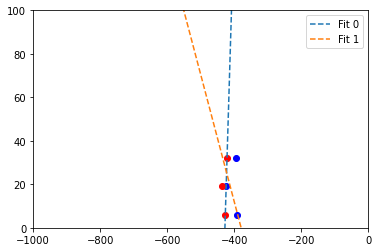

In [29]:
event_n = 1
chamb_n = 3
min_limit = 2
event = df_filter_all.iloc[event_n]
chamb_data = []


#Gets xl, xr values
curr_chamb_inds = event[chambs_inds][event[chambs_inds]==chamb_n].index
for ind in curr_chamb_inds:
    layer, xl, xr = event[ind+1], event[ind+2], event[ind+3]
    chamb_data.append((layer, xl, xr))

xl_vals, xr_vals = [elem[1] for elem in chamb_data], [elem[2] for elem in chamb_data]
xl_vals_global, xr_vals_global = [x_ltg(chamb_n, x) for x in xl_vals], [x_ltg(chamb_n, x) for x in xr_vals]


#Gets z values
layers = [elem[0]-1 for elem in chamb_data]    #Gets correct ordering of layers wrt chambs data
z_layers = [z+(ZCELL//2) for z in local_z_shifts]   #Shifts the z value to the center of the layers
z_vals = [z_layers[int(x)] for x in layers]         #Gets correct local z values wrt the layer order

xl_global = [x_ltg(chamb_n, x) for x in xl_vals]
xr_global = [x_ltg(chamb_n, x) for x in xr_vals]
z_global = [z_ltg(chamb_n, z) for z in z_vals]
plt.plot(xl_global, z_global, 'o', color='blue')
plt.plot(xr_global, z_global, 'o', color='red')


lreg_list, px, pz = chamber_fit(event_n, chamb_n, min_limit)
x_range = np.linspace(-1000, 1000)
for count, lreg in enumerate(lreg_list):
    print(lreg.slope)
    plt.plot(x_range, lreg.slope * x_range + lreg.intercept, linestyle='dashed', label=f'Fit {count}')
    print('Íntercept: ', lreg.intercept)
    print('Slope: ', lreg.slope)

plt.legend()
plt.xlim(-1000, 0)
plt.ylim(0, 100)

print(px)
print(pz)

In [52]:
#Plotting Local and Global Data
def plot(mode, event_n, chamber_n, min_limit):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('z [mm]')

    #Points where the chambers end at
    points = list(zip(global_x_shifts, global_z_shifts))

    #Gets lengths of chambers
    lengths = {x:0 for x in range(4)}
    chambs_df = ch_df()
    for count in range(4):
        xmin, xmax = chambs_df[count]['xleft'].min(), chambs_df[count]['xright'].max()
        lengths[count] = xmax - xmin

    #Plots Layers (blue-red dots and layer outlines)
    for chamb_n in range(4):
        event = df_filter_all.iloc[event_n]
        chamb_data = []

        #Gets xl, xr values
        curr_chamb_inds = event[chambs_inds][event[chambs_inds]==chamb_n].index
        for ind in curr_chamb_inds:
            layer, xl, xr = event[ind+1], event[ind+2], event[ind+3]
            chamb_data.append((layer, xl, xr))

        if not chamb_data: continue

        xl_vals, xr_vals = [elem[1] for elem in chamb_data], [elem[2] for elem in chamb_data]
        xl_vals_global, xr_vals_global = [x_ltg(chamb_n, x) for x in xl_vals], [x_ltg(chamb_n, x) for x in xr_vals]

        #Gets z values
        layers = [elem[0]-1 for elem in chamb_data]    #Gets correct ordering of layers wrt chambs data
        z_layers = [z+(ZCELL//2) for z in local_z_shifts]   #Shifts the z value to the center of the layers
        z_vals = [z_layers[int(x)] for x in layers]         #Gets correct local z values wrt the layer order
        z_vals_global = [z_ltg(chamb_n, z) for z in z_vals]

        #Plots points
        ax.plot(xl_vals_global, z_vals_global, 'o', color='blue')
        ax.plot(xr_vals_global, z_vals_global, 'o', color='red')

        #Plots layers' outlines
        centre_vals_global = [(xl+xr)/2 for (xl, xr) in zip(xl_vals_global, xr_vals_global)]
        for centre, z in zip(centre_vals_global, z_vals_global):
            rect = patches.Rectangle((centre - (XCELL//2), z - (ZCELL//2)), XCELL, ZCELL, linewidth=1, edgecolor='grey', facecolor='none')
            ax.add_patch(rect)
        

    #Plots chambers
    for pos, point in enumerate(points):
        chamber_len = lengths[pos]
        rect = patches.Rectangle((point[0]-chamber_len, point[1]), chamber_len, (ZCELL*4), linewidth=1, edgecolor='grey', facecolor='none')
        ax.add_patch(rect)


    #Plots Local Fits
    x_global_range = np.linspace(-1000, 1000, 1000)
    pr_x_vals, pl_x_vals = [], []
    pr_z_vals, pl_z_vals = [], []

    for chamb_n in range(4):
        lreg_list, p_x_global, p_z_global = chamber_fit(event_n, chamb_n, min_limit)
        if not lreg_list: continue

        for lreg in lreg_list:
            z_fit = lreg.slope * x_global_range + lreg.intercept
            plt.plot(x_global_range, z_fit, linestyle='dashed')

    #print(chamb_n, p_x_global, p_z_global)
        if chamb_n in [0, 1]:
            pr_x_vals.append(p_x_global)
            pr_z_vals.append(p_z_global)
        if chamb_n in [2, 3]:
            pl_x_vals.append(p_x_global)
            pl_z_vals.append(p_z_global)
    print(pr_x_vals)
    print(pr_z_vals)
    print(pl_x_vals)
    print(pl_z_vals)
    
    if pl_x_vals:
        pl_x_flat = [x for sublist in pl_x_vals for x in sublist]
        pl_z_flat = [z for sublist in pl_z_vals for z in sublist]

        lreg_l_global = linregress(pl_x_flat, pl_z_flat)

        z_fit_global = lreg_l_global.slope * x_global_range + lreg_l_global.intercept
        plt.plot(x_global_range, z_fit_global, color='black')
    if pr_x_vals:
        pr_x_flat = [x for sublist in pr_x_vals for x in sublist]
        pr_z_flat = [z for sublist in pr_z_vals for z in sublist]  

        lreg_r_global = linregress(pr_x_flat, pr_z_flat) 

        z_fit_global = lreg_r_global.slope * x_global_range + lreg_r_global.intercept
        plt.plot(x_global_range, z_fit_global, color='black')
    

    
    

    plt.title(f'Event {event_n}')


    if mode == 'global':
        #Global View
        plt.xlim([-1000, 1000])
        plt.ylim([-100, 1000])

    elif mode == 'local':
        if chamber_n == 0: 
            #Chamber0 View
            plt.xlim([250, 700])
            plt.ylim([800, 1000])
        elif chamber_n == 1:
            #Chamber1 View
            plt.xlim([250, 700])
            plt.ylim([-100, 200])
        elif chamber_n == 2:
            #Chamber2 View
            plt.xlim([-1000, -250])
            plt.ylim([800, 1000])
        else:
            #Chamber3 View
            plt.xlim([-1000, -500])
            plt.ylim([-100, 200])

[]
[]
[[-512.0, -512.0, -511.2, -510.9], [-498.0, -498.3, -498.7, -498.8]]
[[868.5, 842.5, 855.5, 829.5], [32.0, 45.0, 6.0, 19.0]]


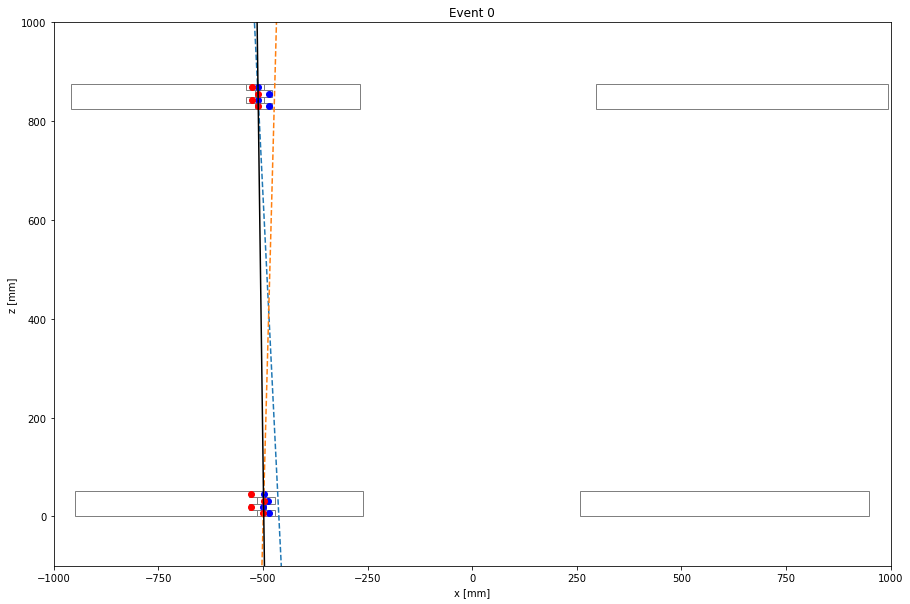

In [55]:
plot('global', 0, 2, 1)

In [16]:
lreg_events = []
for event_n in range(df_filter_all.shape[0]):
    lreg_events.append(chamber_fit)